In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
stars = pd.read_csv('../data/stars.csv')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ml_utils.regression import plot_residuals

Ознакомление с данными

In [3]:
stars

,temperature,magV,mass,spectraltype,magJ,radius,magB,magH,magK,metallicity,name,planets
0,4742.0,4.740,2.70,G8 III,2.943,19.000,5.740,2.484,2.282,-0.350,11 Com,1.0
1,4340.0,5.024,1.80,K4III,2.876,24.080,6.415,2.091,1.939,0.040,11 UMi,1.0
2,4813.0,5.220,2.20,K0III,3.019,11.000,6.240,2.608,2.331,-0.240,14 And,1.0
3,5311.0,6.670,1.00,K0 V,5.158,0.708,7.570,4.803,4.714,0.430,14 Her,2.0
4,5825.0,5.950,1.11,G2V,5.090,1.243,6.590,4.720,4.430,0.096,16 Cygni A,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3178,6720.0,NaN,1.47,F5,NaN,1.930,NaN,NaN,NaN,-0.070,XO-6,1.0
3179,6250.0,10.520,1.41,G0V,9.557,1.480,NaN,9.308,9.241,0.432,XO-7,1.0
3180,5780.0,14.676,1.01,G5V,13.366,0.990,15.280,13.041,12.965,0.023,YBP1194,1.0
3181,5725.0,14.798,0.96,G5V,13.474,0.890,15.500,13.157,13.105,0.030,YBP1514,1.0


In [4]:
stars.describe()

,temperature,magV,mass,magJ,radius,magB,magH,magK,metallicity,planets
count,2793.000000,1274.000000,3090.000000,1563.000000,2721.000000,1003.000000,1556.000000,1585.000000,2411.000000,3183.000000
mean,5532.146084,10.304334,0.960175,9.899493,1.605091,10.730635,9.525366,9.408291,0.017893,1.273327
std,1715.076581,3.148937,0.362107,3.226399,3.689890,3.032962,3.253978,3.214560,0.183447,0.853176
min,485.000000,0.010000,0.010000,-1.150000,0.000014,0.720000,-1.380000,-1.490000,-2.090000,0.000000
25%,5078.000000,7.950000,0.807250,7.013500,0.812000,8.512500,6.664750,6.589000,-0.060000,1.000000
50%,5627.000000,10.471500,0.964000,10.600000,0.999000,10.810000,10.248500,10.161000,0.020000,1.000000
75%,5949.000000,12.543500,1.110000,12.607500,1.270000,13.010000,12.230250,12.119000,0.110000,1.000000
max,57000.000000,24.300000,4.500000,21.600000,83.800000,19.860000,20.800000,19.160000,0.560000,9.000000


<AxesSubplot:>

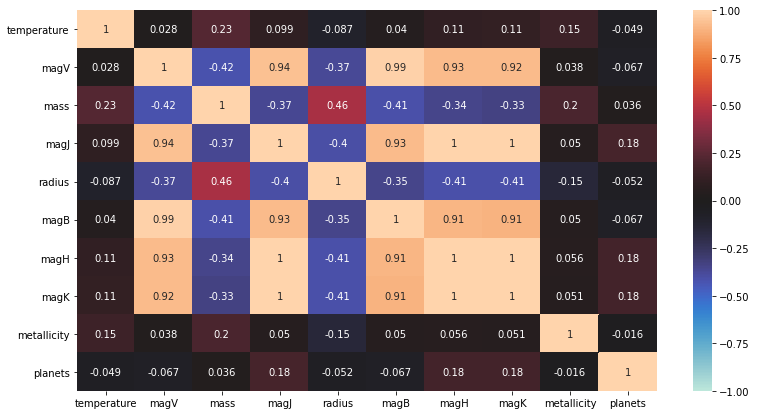

In [5]:
fig = plt.figure(figsize=(13, 7))
sns.heatmap(stars.corr(), vmin=-1, vmax=1, center=0, annot=True)

Построение и рассчет модели

In [6]:
data = stars[['metallicity', 'temperature', 'magJ', 'radius', 'magB', 'magV', 'magK', 'mass', 'planets']].dropna()

y = data.pop('temperature')
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm.score(X_test, y_test)

0.8802635807410467

In [54]:
np.sqrt(mean_squared_error(y_test, lm.predict(X_test)))

257.89448291516237

Уравнение линейной регрессии

In [7]:
[(coef, column) for coef, column in zip(lm.coef_, X_train.columns)]

[(-4.898158363102772, 'metallicity'),
 (-990.8923592796466, 'magJ'),
 (4.462127721265688, 'radius'),
 (-327.75953675293704, 'magB'),
 (-174.9177532608752, 'magV'),
 (1526.7115565985305, 'magK'),
 (276.1534979898905, 'mass'),
 (-29.078901388578036, 'planets')]

In [8]:
lm.intercept_

6646.481691954724

Визуализация

array([<AxesSubplot:xlabel='Observation', ylabel='Residual'>,
       <AxesSubplot:xlabel='Residual', ylabel='Density'>], dtype=object)

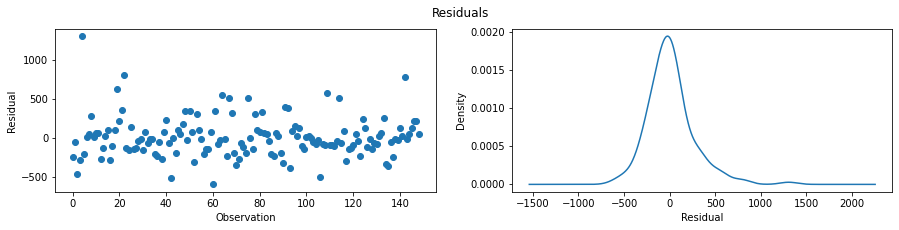

In [9]:
plot_residuals(y_test, lm.predict(X_test))